In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from xgboost import XGBClassifier

Preprocessing Data

In [2]:
df = pd.read_csv("/content/df_export.csv")
df.head()

,Unnamed: 0,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,income_ranges,Age_Ranges
0,0,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,Moderate,Moderate,Fair,Yes,No,Yes,Yes,"(25000, 50000]",young adult
1,1,Married,High School,1,Non-smoker,Sedentary,Employed,High,Unhealthy,Fair,Yes,No,No,Yes,"(25000, 50000]",adult
2,2,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,Low,Unhealthy,Good,No,No,Yes,No,"(125000, 150000]",senior
3,3,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,Moderate,Moderate,Poor,No,No,No,No,"(0, 25000]",adult
4,4,Single,High School,0,Non-smoker,Sedentary,Unemployed,Low,Moderate,Fair,Yes,No,Yes,Yes,"(0, 25000]",young adult


In [3]:
df=df.drop("Unnamed: 0", axis=1)
df.head()

,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,income_ranges,Age_Ranges
0,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,Moderate,Moderate,Fair,Yes,No,Yes,Yes,"(25000, 50000]",young adult
1,Married,High School,1,Non-smoker,Sedentary,Employed,High,Unhealthy,Fair,Yes,No,No,Yes,"(25000, 50000]",adult
2,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,Low,Unhealthy,Good,No,No,Yes,No,"(125000, 150000]",senior
3,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,Moderate,Moderate,Poor,No,No,No,No,"(0, 25000]",adult
4,Single,High School,0,Non-smoker,Sedentary,Unemployed,Low,Moderate,Fair,Yes,No,Yes,Yes,"(0, 25000]",young adult


In [4]:
alcohol_use = [["Low", "Moderate", "High"]]
alcohol_encoder = OrdinalEncoder(categories=alcohol_use)
df["alcohol_use"] = alcohol_encoder.fit_transform(df[["Alcohol Consumption"]])
df.head()

,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,income_ranges,Age_Ranges,alcohol_use
0,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,Moderate,Moderate,Fair,Yes,No,Yes,Yes,"(25000, 50000]",young adult,1.0
1,Married,High School,1,Non-smoker,Sedentary,Employed,High,Unhealthy,Fair,Yes,No,No,Yes,"(25000, 50000]",adult,2.0
2,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,Low,Unhealthy,Good,No,No,Yes,No,"(125000, 150000]",senior,0.0
3,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,Moderate,Moderate,Poor,No,No,No,No,"(0, 25000]",adult,1.0
4,Single,High School,0,Non-smoker,Sedentary,Unemployed,Low,Moderate,Fair,Yes,No,Yes,Yes,"(0, 25000]",young adult,0.0


In [5]:
diet = [["Unhealthy", "Moderate", "Healthy"]]
diet_encoder = OrdinalEncoder(categories=diet)
df["diet"] = diet_encoder.fit_transform(df[["Dietary Habits"]])
df.head()

,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,income_ranges,Age_Ranges,alcohol_use,diet
0,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,Moderate,Moderate,Fair,Yes,No,Yes,Yes,"(25000, 50000]",young adult,1.0,1.0
1,Married,High School,1,Non-smoker,Sedentary,Employed,High,Unhealthy,Fair,Yes,No,No,Yes,"(25000, 50000]",adult,2.0,0.0
2,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,Low,Unhealthy,Good,No,No,Yes,No,"(125000, 150000]",senior,0.0,0.0
3,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,Moderate,Moderate,Poor,No,No,No,No,"(0, 25000]",adult,1.0,1.0
4,Single,High School,0,Non-smoker,Sedentary,Unemployed,Low,Moderate,Fair,Yes,No,Yes,Yes,"(0, 25000]",young adult,0.0,1.0


In [6]:
activity_level = [["Sedentary", "Moderate", "Active"]]
activity_encoder = OrdinalEncoder(categories=activity_level)
df["activity_level"] = activity_encoder.fit_transform(df[["Physical Activity Level"]])
df.head()

,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,income_ranges,Age_Ranges,alcohol_use,diet,activity_level
0,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,Moderate,Moderate,Fair,Yes,No,Yes,Yes,"(25000, 50000]",young adult,1.0,1.0,2.0
1,Married,High School,1,Non-smoker,Sedentary,Employed,High,Unhealthy,Fair,Yes,No,No,Yes,"(25000, 50000]",adult,2.0,0.0,0.0
2,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,Low,Unhealthy,Good,No,No,Yes,No,"(125000, 150000]",senior,0.0,0.0,0.0
3,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,Moderate,Moderate,Poor,No,No,No,No,"(0, 25000]",adult,1.0,1.0,1.0
4,Single,High School,0,Non-smoker,Sedentary,Unemployed,Low,Moderate,Fair,Yes,No,Yes,Yes,"(0, 25000]",young adult,0.0,1.0,0.0


In [7]:
sleep = [["Poor", "Fair", "Good"]]
sleep_encoder = OrdinalEncoder(categories=sleep)
df["sleep_quality"] = sleep_encoder.fit_transform(df[["Sleep Patterns"]])
df.head()

,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,income_ranges,Age_Ranges,alcohol_use,diet,activity_level,sleep_quality
0,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,Moderate,Moderate,Fair,Yes,No,Yes,Yes,"(25000, 50000]",young adult,1.0,1.0,2.0,1.0
1,Married,High School,1,Non-smoker,Sedentary,Employed,High,Unhealthy,Fair,Yes,No,No,Yes,"(25000, 50000]",adult,2.0,0.0,0.0,1.0
2,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,Low,Unhealthy,Good,No,No,Yes,No,"(125000, 150000]",senior,0.0,0.0,0.0,2.0
3,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,Moderate,Moderate,Poor,No,No,No,No,"(0, 25000]",adult,1.0,1.0,1.0,0.0
4,Single,High School,0,Non-smoker,Sedentary,Unemployed,Low,Moderate,Fair,Yes,No,Yes,Yes,"(0, 25000]",young adult,0.0,1.0,0.0,1.0


In [8]:
df=df.drop(["Alcohol Consumption", "Dietary Habits", "Physical Activity Level", "Sleep Patterns"], axis=1)
df.head()

,Marital Status,Education Level,Number of Children,Smoking Status,Employment Status,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,income_ranges,Age_Ranges,alcohol_use,diet,activity_level,sleep_quality
0,Married,Bachelor's Degree,2,Non-smoker,Unemployed,Yes,No,Yes,Yes,"(25000, 50000]",young adult,1.0,1.0,2.0,1.0
1,Married,High School,1,Non-smoker,Employed,Yes,No,No,Yes,"(25000, 50000]",adult,2.0,0.0,0.0,1.0
2,Widowed,Master's Degree,1,Non-smoker,Employed,No,No,Yes,No,"(125000, 150000]",senior,0.0,0.0,0.0,2.0
3,Divorced,Master's Degree,3,Non-smoker,Unemployed,No,No,No,No,"(0, 25000]",adult,1.0,1.0,1.0,0.0
4,Single,High School,0,Non-smoker,Unemployed,Yes,No,Yes,Yes,"(0, 25000]",young adult,0.0,1.0,0.0,1.0


In [9]:
df=df.rename(columns={"Marital Status":"marital_status",
                      "Education Level":"education",
                      "Smoking Status":"smoking_status",
                      "Employment Status":"employment_status",
                      "History of Mental Illness":"history_of_mental_illness",
                      "History of Substance Abuse":"history_of_substance_abuse",
                      "Family History of Depression":"family_history_of_depression",
                      "Chronic Medical Conditions":"chronic_medical_conditions",
                      "Income Ranges":"income_ranges",
                      "Age_Ranges":"age_ranges",
                      "Number of Children":"number_of_children"
                      })
df.head()

,marital_status,education,number_of_children,smoking_status,employment_status,history_of_mental_illness,history_of_substance_abuse,family_history_of_depression,chronic_medical_conditions,income_ranges,age_ranges,alcohol_use,diet,activity_level,sleep_quality
0,Married,Bachelor's Degree,2,Non-smoker,Unemployed,Yes,No,Yes,Yes,"(25000, 50000]",young adult,1.0,1.0,2.0,1.0
1,Married,High School,1,Non-smoker,Employed,Yes,No,No,Yes,"(25000, 50000]",adult,2.0,0.0,0.0,1.0
2,Widowed,Master's Degree,1,Non-smoker,Employed,No,No,Yes,No,"(125000, 150000]",senior,0.0,0.0,0.0,2.0
3,Divorced,Master's Degree,3,Non-smoker,Unemployed,No,No,No,No,"(0, 25000]",adult,1.0,1.0,1.0,0.0
4,Single,High School,0,Non-smoker,Unemployed,Yes,No,Yes,Yes,"(0, 25000]",young adult,0.0,1.0,0.0,1.0


In [10]:
df=pd.get_dummies(df,columns=["marital_status","education","smoking_status","employment_status","history_of_mental_illness","history_of_substance_abuse","family_history_of_depression","chronic_medical_conditions","income_ranges","age_ranges"],dtype=int)
df.head()

,number_of_children,alcohol_use,diet,activity_level,sleep_quality,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Widowed,education_Associate Degree,...,"income_ranges_(125000, 150000]","income_ranges_(150000, 175000]","income_ranges_(175000, 200000]","income_ranges_(200000, 225000]","income_ranges_(25000, 50000]","income_ranges_(50000, 75000]","income_ranges_(75000, 100000]",age_ranges_adult,age_ranges_senior,age_ranges_young adult
0,2,1.0,1.0,2.0,1.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,1,2.0,0.0,0.0,1.0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1,0.0,0.0,0.0,2.0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
3,3,1.0,1.0,1.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0.0,1.0,0.0,1.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [11]:
df=df.drop(columns=["history_of_mental_illness_No"])

In [12]:
y=df["history_of_mental_illness_Yes"]
X=df.drop("history_of_mental_illness_Yes", axis=1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
xgb_clf=XGBClassifier(
    objective="binary:logistic",
    n_estimators=100,
    learning_rate=0.1
)

In [15]:
X_train.columns = X_train.columns.astype(str).str.replace(r'[\[\]<>]', '_', regex=True)
X_test.columns = X_test.columns.astype(str).str.replace(r'[\[\]<>]', '_', regex=True)


In [16]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [17]:
predictions=xgb_clf.predict(X_test)

In [23]:
print(f'Accuracy: {accuracy_score(y_test, predictions)}')
print("Precision:", precision_score(y_test, predictions))
print("Recall:", recall_score(y_test, predictions))
print("F1 Score:", f1_score(y_test, predictions))
auc = roc_auc_score(y_test, predictions)
print("AUC Score:", auc)

Accuracy: 0.6943697917673672
Precision: 0.3157894736842105
Recall: 0.00018982536066818528
F1 Score: 0.0003794226452082082
AUC Score: 0.500004426281136


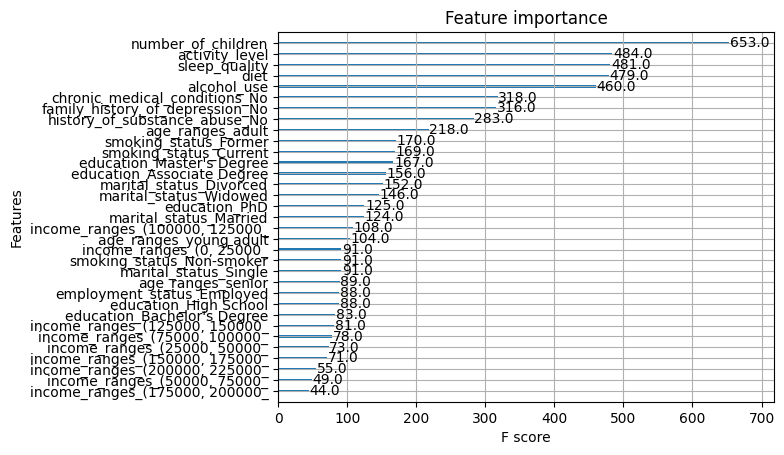

In [24]:
import matplotlib.pyplot as plt
xgb.plot_importance(xgb_clf)
plt.rcParams['figure.figsize'] = [6, 4]
plt.show()